# Import software libraries

In [2]:
#!pip install yellowbrick

In [3]:
# Import required libraries.
import sys                                                  # Read system parameters.
import pandas as pd                                         # Manipulate and analyze data.
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns                                       # Make charting easier.
import yellowbrick                                          # Visualize elbow and silhouette plots.
from yellowbrick.cluster import SilhouetteVisualizer
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle                                               # Save Python objects as binary files.
from collections import Counter
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- Yellowbrick {}'.format(yellowbrick.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))

Libraries used in this project:
- Python 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
- pandas 2.2.1
- Matplotlib 3.8.0
- Seaborn 0.11.0
- Yellowbrick 1.5
- scikit-learn 1.2.2


# Read and examine the data

In [4]:
# Read the data.
customer_data = pd.read_pickle('../data/customer_data_preprocessed.pickle')


# Preview the first five rows of the data.
customer_data.head()


,frequency,recency,monetary_value,num_unique_items,tenure,churned
CustomerID,,,,,,
u12747,11,3,302.76,3,369.0,1.0
u12748,95,2,783.19,10,369.0,0.0
u12749,6,4,251.42,3,130.0,1.0
u1282,1,327,17.70,1,326.0,0.0
u12822,1,88,16.50,1,87.0,1.0


In [5]:
# Get summary statistics for the dataset.
# Count, mean, standard deviation, minimum, maximum, etc.

customer_data.describe(include='all')

,frequency,recency,monetary_value,num_unique_items,tenure,churned
count,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000
mean,5.465258,107.795305,152.446244,2.532394,214.496244,0.352113
std,8.530990,100.039421,441.992190,1.645733,112.923328,0.477741
min,1.000000,1.000000,0.550000,1.000000,1.000000,0.000000
25%,1.000000,25.250000,18.515000,1.000000,110.000000,0.000000
50%,3.000000,72.000000,47.860000,2.000000,240.000000,0.000000
75%,6.000000,171.000000,130.440000,3.000000,311.000000,1.000000
max,171.000000,374.000000,10281.200000,10.000000,373.000000,1.000000


In [6]:
# Check the structure of the data.
customer_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2130 entries, u12747 to u18283
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   frequency         2130 non-null   int64  
 1   recency           2130 non-null   int64  
 2   monetary_value    2130 non-null   float64
 3   num_unique_items  2130 non-null   int64  
 4   tenure            2130 non-null   float64
 5   churned           2130 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 116.5+ KB


In [7]:
# Get the shape of the data.
customer_data.shape


(2130, 6)

# Train a *k*-means clustering model

In [8]:
# Standardize the training data.
scaler = StandardScaler()
scaler.fit(customer_data)
customer_data_scaled = scaler.transform(customer_data)

## Use Elbow Method to Identify Optimum Number of Clusters

In [9]:
def optimal_number_clusters(data_scaled):
    """Calculates optimal number of clusters based on elbow method."""
    
    sum_of_squared_distances = []
    K = range(1, 30)  # Define the range of clusters to try.

    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(data_scaled)
        sum_of_squared_distances.append(km.inertia_)

    # Plotting the elbow curve with annotated cluster numbers
    plt.figure(figsize=(10, 6))
    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow Method For Optimal Number of Clusters')
    
    # Annotate the plot with cluster numbers
    for i, k in enumerate(K):
        plt.annotate(f'{k}', (K[i], sum_of_squared_distances[i]), textcoords="offset points", xytext=(0, 10), ha='center')
    
    plt.show()




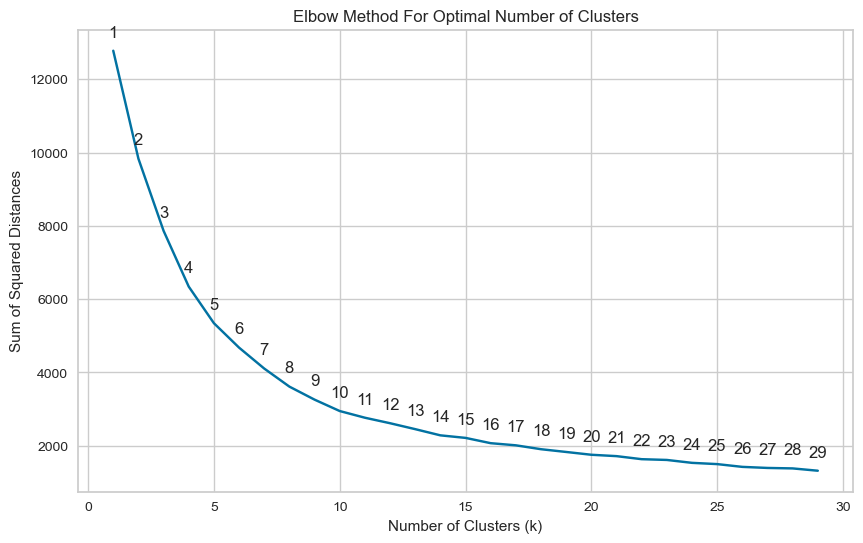

In [10]:
# Call the function to cluster the scaled data and generate an elbow point.
optimal_number_clusters(customer_data_scaled)


# Perform silhouette analysis on the clustering model

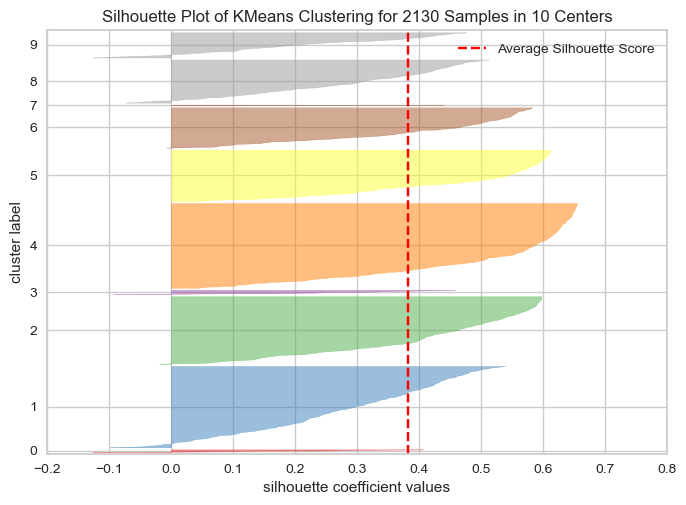

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2130 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
# Use SilhouetteVisualizer() to generate silhouette plots and scores for a model with 10 clusters.
SEED = 123456789
silhouette = SilhouetteVisualizer(KMeans(10,random_state=SEED))
silhouette.fit(customer_data_scaled)
silhouette.show()


In [12]:
# Print the number of clusters and the silhouette score.


silhouette.n_clusters_ , silhouette.silhouette_score_

(10, 0.3821910338453836)

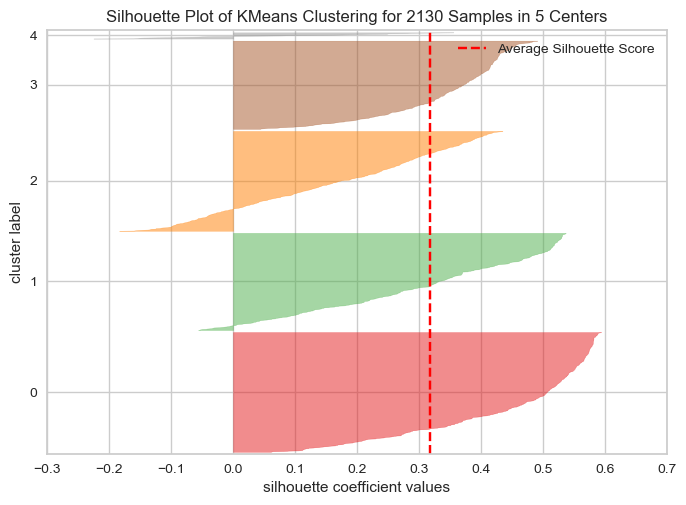

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2130 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
# Use SilhouetteVisualizer() to generate silhouette plots and scores for a model with 5 clusters.
silhouette = SilhouetteVisualizer(KMeans(5,random_state=SEED))
silhouette.fit(customer_data_scaled)
silhouette.poof()





In [14]:
# Print the number of clusters and the silhouette score.


silhouette.n_clusters_ , silhouette.silhouette_score_

(5, 0.3177487575866532)

## Find the optimal number of clusters

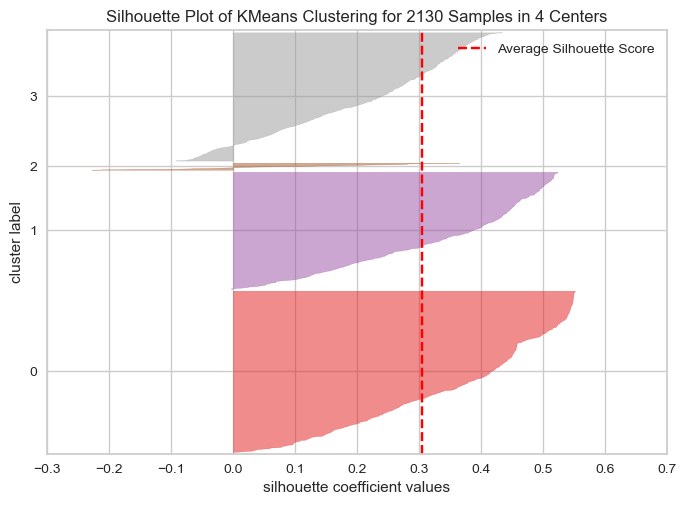

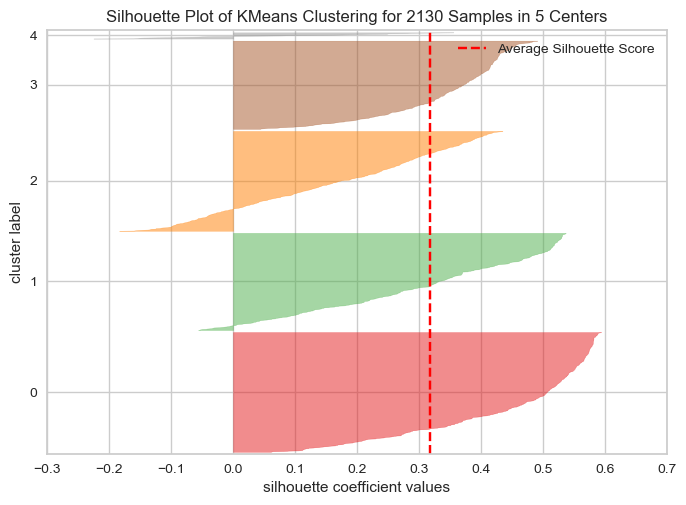

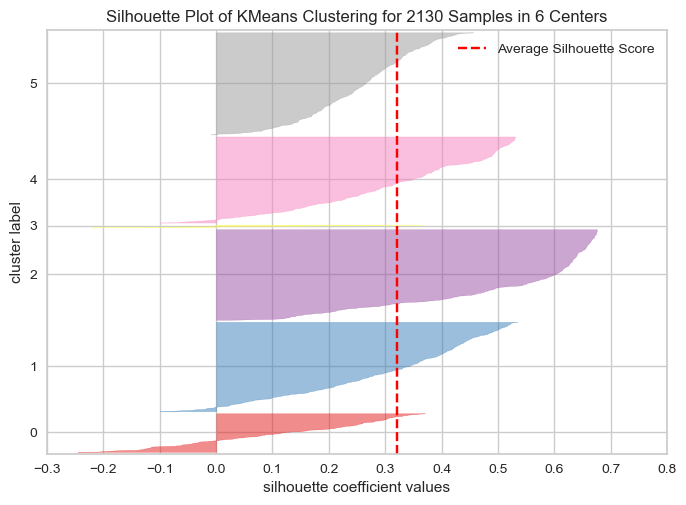

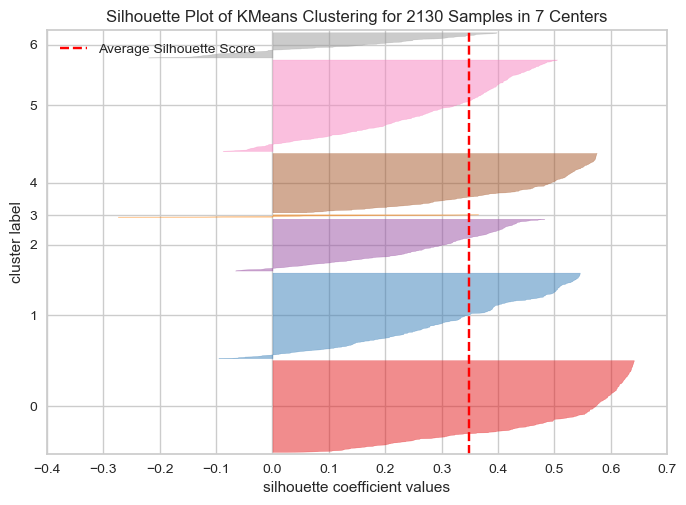

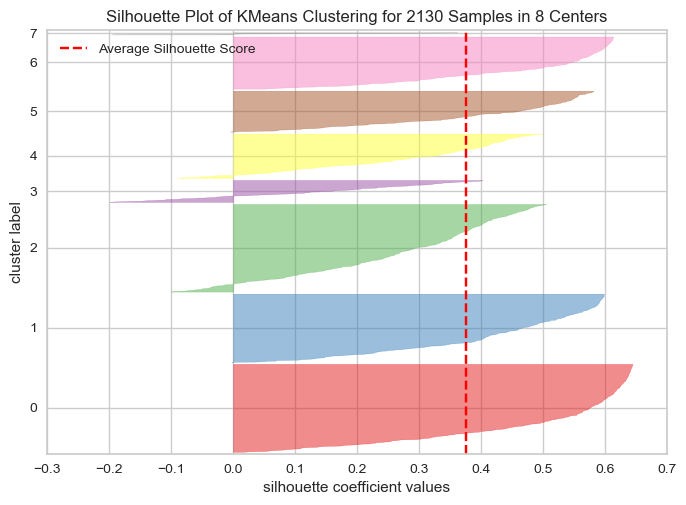

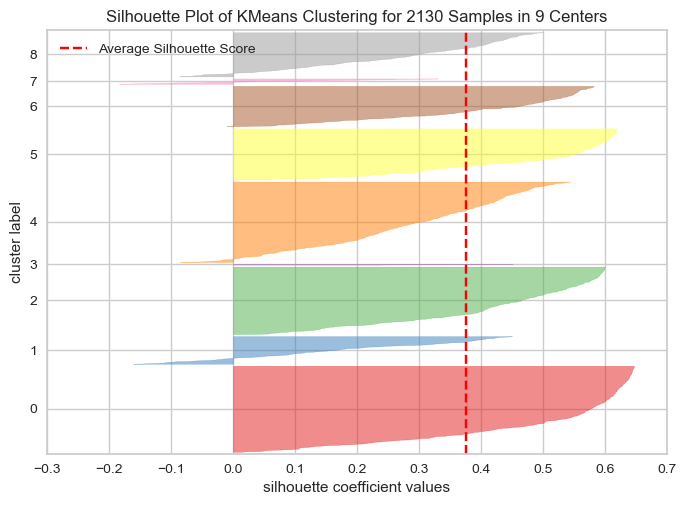

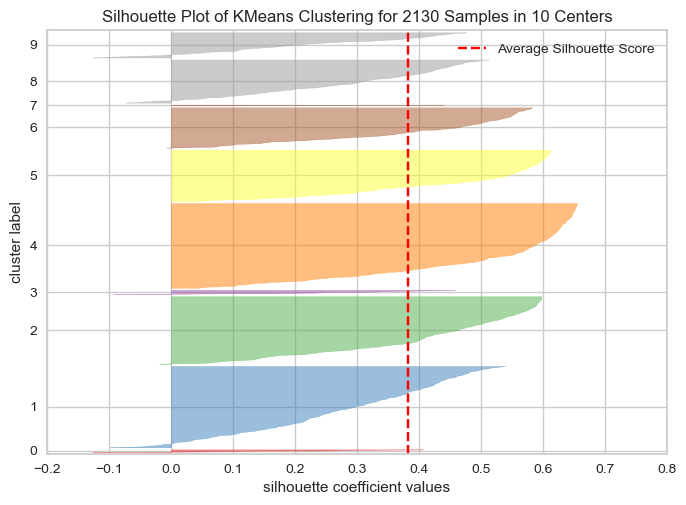

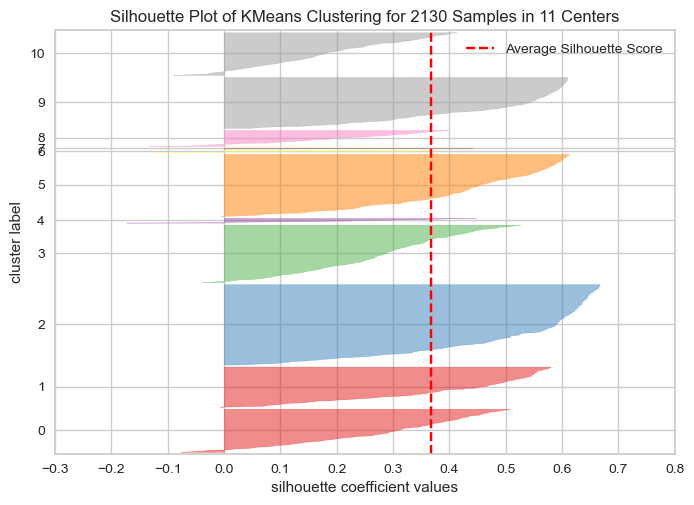

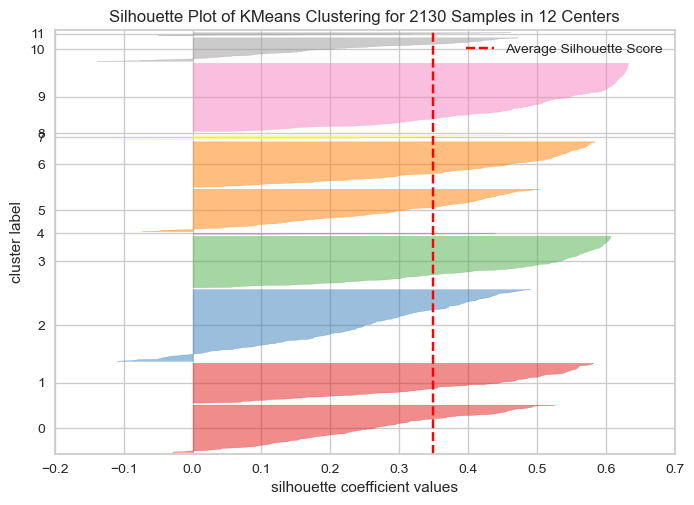

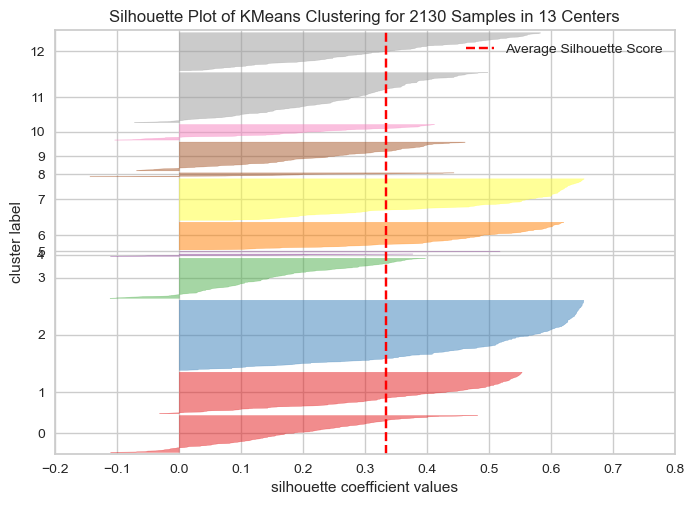

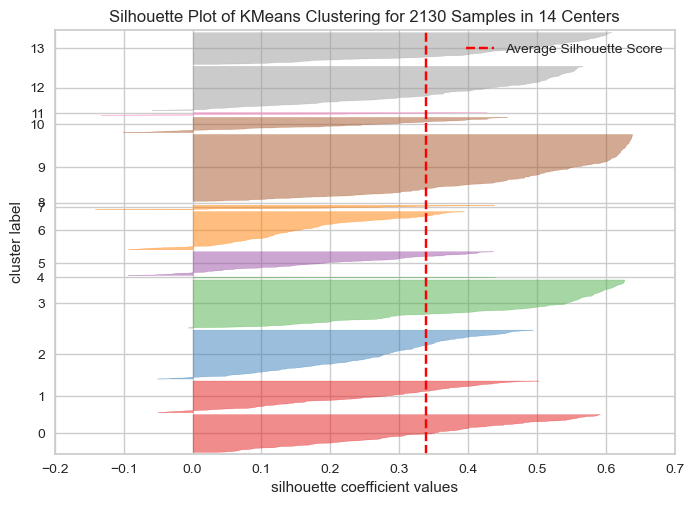

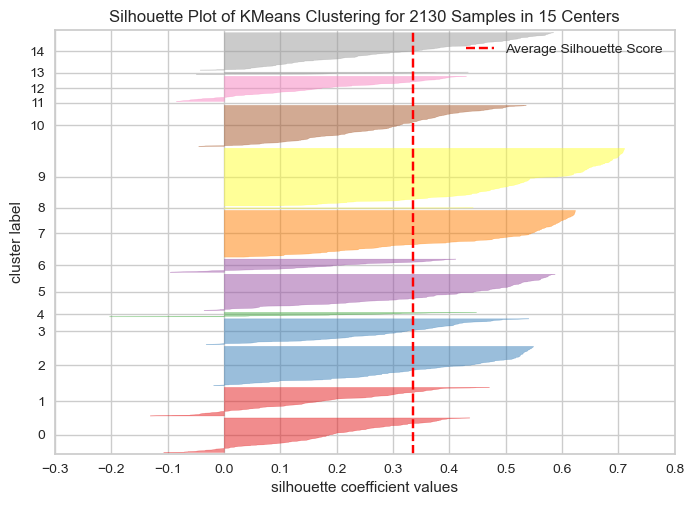

{4: 0.3047,
 5: 0.3177,
 6: 0.3216,
 7: 0.3488,
 8: 0.3756,
 9: 0.3762,
 10: 0.3822,
 11: 0.368,
 12: 0.3484,
 13: 0.3337,
 14: 0.3389,
 15: 0.3357}

In [37]:
n_clusters = list(range(4,16))
scores_dict = {}
for n_cluster in n_clusters:
    silhouette = \
    SilhouetteVisualizer(KMeans(n_cluster,
                                random_state=SEED))
    silhouette.fit(customer_data_scaled)
    silhouette.poof()
    scores_dict[n_cluster] = \
    silhouette.silhouette_score_.round(4)
scores_dict

In [16]:
list(scores_dict.values())

[0.3047,
 0.3177,
 0.3216,
 0.3488,
 0.3756,
 0.3762,
 0.3822,
 0.368,
 0.3484,
 0.3337,
 0.3389,
 0.3357]

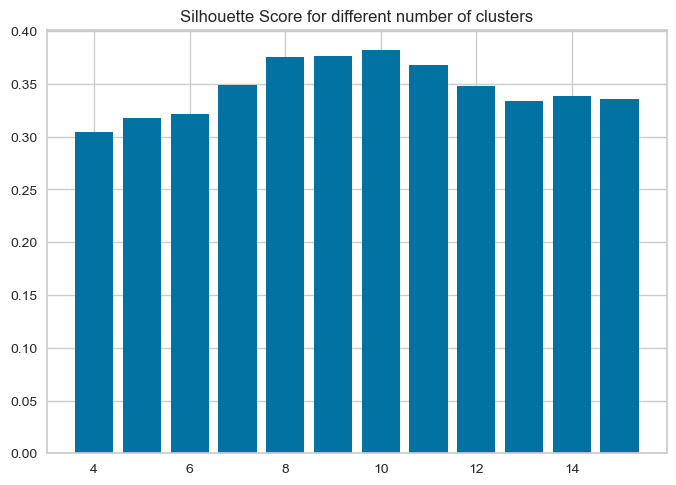

In [17]:
plt.bar(x=list(scores_dict.keys()),height=list(scores_dict.values()))
plt.title("Silhouette Score for different number of clusters")
plt.show()

In [18]:
len(customer_data_scaled)

2130

We take 5 as the number of clusters to avoid ending with so many clusters regarding business purposes and considering elbow method.

# Train an optimal clustering model

In [19]:

# Generate a k-means clustering model using this optimal number of clusters and fit it on the data.
kmeans = KMeans(n_clusters=8,random_state=SEED)

kmeans.fit(customer_data_scaled)

KMeans(random_state=123456789)

In [20]:
# Determine the clusters for the users.
y_kmeans = kmeans.predict(customer_data_scaled)


# Print a DataFrame that shows each customer and their assigned cluster.
results = customer_data.copy()
results.insert(0, 'cluster', y_kmeans)


# Obtain the first five rows.
results.head()


,cluster,frequency,recency,monetary_value,num_unique_items,tenure,churned
CustomerID,,,,,,,
u12747,4,11,3,302.76,3,369.0,1.0
u12748,3,95,2,783.19,10,369.0,0.0
u12749,6,6,4,251.42,3,130.0,1.0
u1282,1,1,327,17.70,1,326.0,0.0
u12822,6,1,88,16.50,1,87.0,1.0


# Evaluate the clustering model as a whole

In [21]:
results.cluster.value_counts()

cluster
0    462
2    460
1    358
6    274
4    233
5    215
3    116
7     12
Name: count, dtype: int64

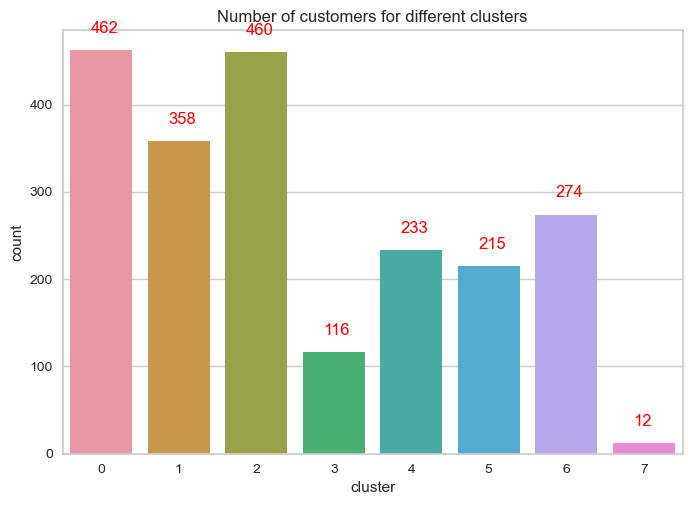

In [38]:
# Generate a bar chart that shows how many users were assigned to each cluster.
ax = sns.countplot(data=results,x="cluster")
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width()/3, p.get_height()+20),color='red')
plt.title("Number of customers for different clusters")
plt.show()



# Evaluate summary statistics for individual clusters

In [23]:
# Get summmary statistics for cluster 0.
results[results.cluster == 0].describe()


,cluster,frequency,recency,monetary_value,num_unique_items,tenure,churned
count,462.0,462.000000,462.000000,462.000000,462.000000,462.000000,462.0
mean,0.0,2.129870,59.703463,49.404437,1.619048,81.000000,0.0
std,0.0,1.471499,42.102508,121.408176,0.799881,54.290773,0.0
min,0.0,1.000000,2.000000,0.550000,1.000000,1.000000,0.0
25%,0.0,1.000000,24.000000,13.520000,1.000000,36.000000,0.0
50%,0.0,2.000000,52.000000,24.720000,1.000000,74.000000,0.0
75%,0.0,3.000000,87.750000,48.562500,2.000000,115.000000,0.0
max,0.0,11.000000,165.000000,1892.100000,4.000000,245.000000,0.0


In [24]:
# Get the average amount spent by cluster 0.
results[results.cluster==0]['monetary_value'].mean()


49.40443722943723

In [25]:
# Get summmary statistics for cluster 3.
results[results.cluster == 3].describe()


,cluster,frequency,recency,monetary_value,num_unique_items,tenure,churned
count,116.0,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,3.0,26.681034,22.750000,721.161293,6.241379,319.732759,0.215517
std,0.0,13.078758,27.941515,608.672532,1.535780,64.781419,0.412965
min,3.0,10.000000,1.000000,79.010000,3.000000,39.000000,0.000000
25%,3.0,20.000000,5.000000,275.757500,5.000000,289.750000,0.000000
50%,3.0,23.000000,12.000000,533.780000,6.000000,338.000000,0.000000
75%,3.0,28.000000,30.000000,875.507500,7.000000,365.000000,0.000000
max,3.0,95.000000,187.000000,2596.640000,10.000000,373.000000,1.000000


In [26]:
# Get the average amount spent by cluster 3.
results[results.cluster==3]['monetary_value'].mean()


721.1612931034482

In [27]:
# Get summmary statistics for cluster 4.
results[results.cluster == 4].describe()


,cluster,frequency,recency,monetary_value,num_unique_items,tenure,churned
count,233.0,233.000000,233.000000,233.000000,233.000000,233.000000,233.0
mean,4.0,7.871245,56.871245,202.497468,3.729614,293.004292,1.0
std,0.0,3.971958,50.557501,242.368877,1.283123,66.844293,0.0
min,4.0,2.000000,1.000000,3.950000,1.000000,52.000000,1.0
25%,4.0,5.000000,17.000000,73.700000,3.000000,252.000000,1.0
50%,4.0,7.000000,44.000000,135.850000,4.000000,310.000000,1.0
75%,4.0,10.000000,83.000000,254.930000,5.000000,354.000000,1.0
max,4.0,21.000000,242.000000,2023.450000,8.000000,373.000000,1.0


In [28]:
# Get the average amount spent by cluster 4.
results[results.cluster==4]['monetary_value'].mean()


202.4974678111588

# Evaluate the distribution of features for individual clusters

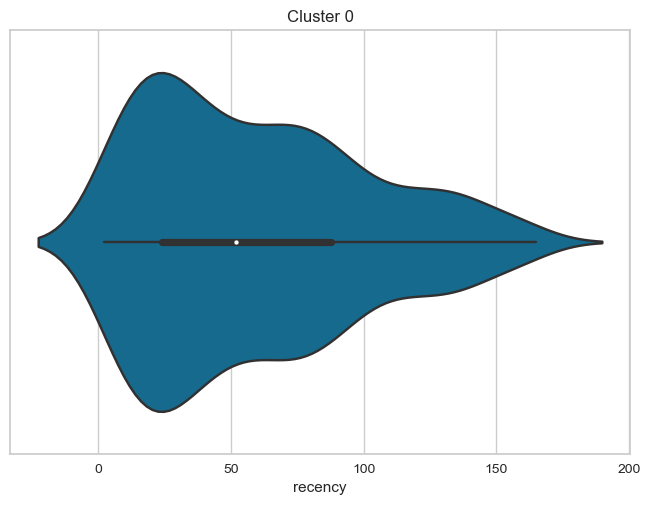

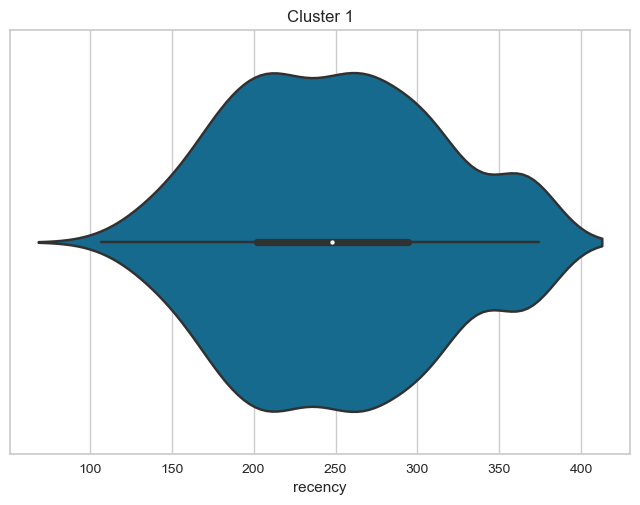

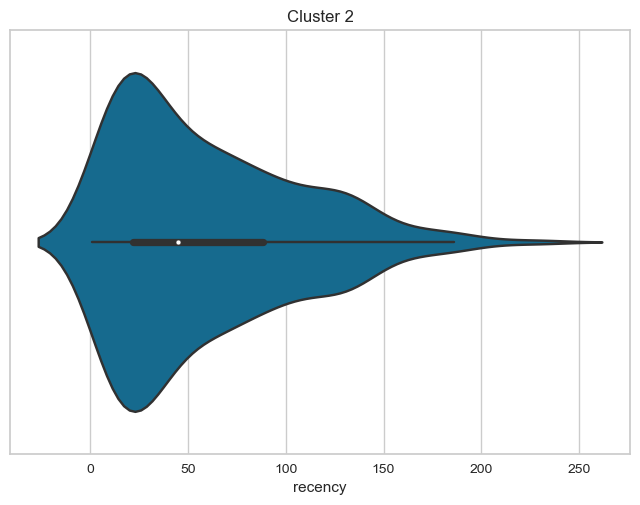

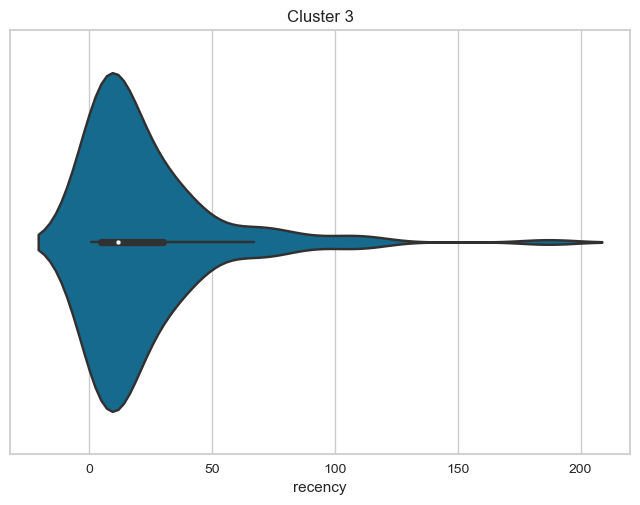

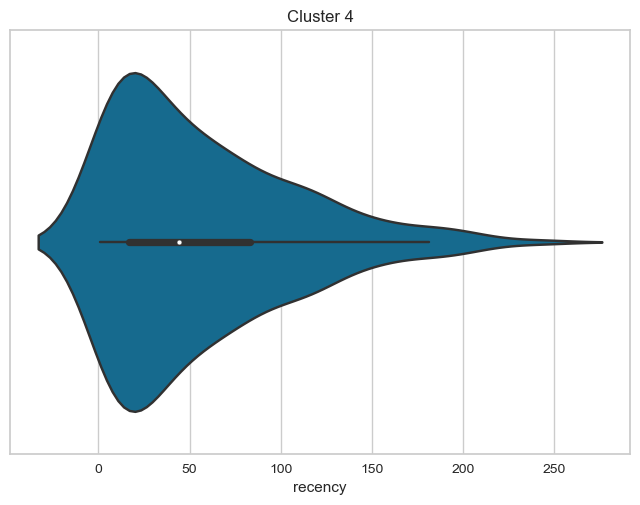

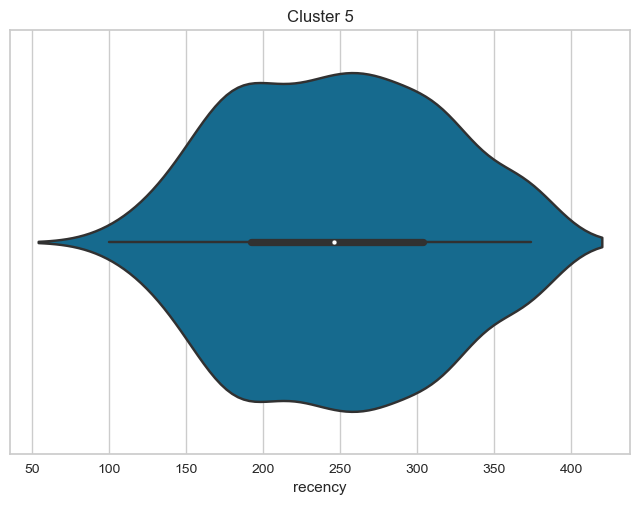

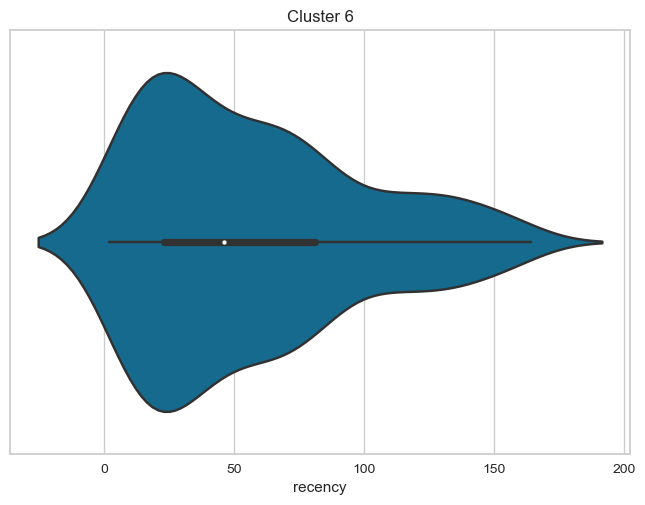

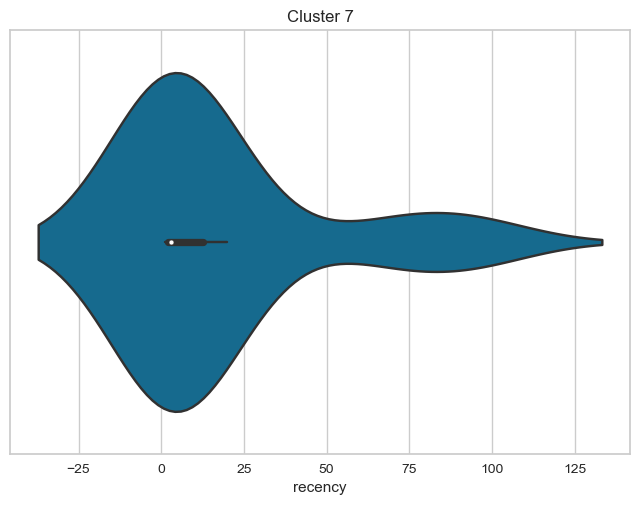

In [29]:
# Generate violin subplots for the distribution of the "recency" feature for each of the clusters.
for i in range(8):
    sns.violinplot(x = results[results['cluster'] == i]['recency'])
    plt.title(f"Cluster {i}")
    plt.show()

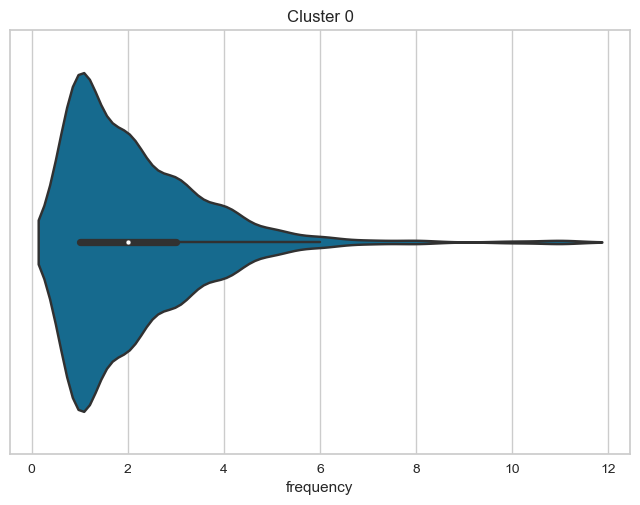

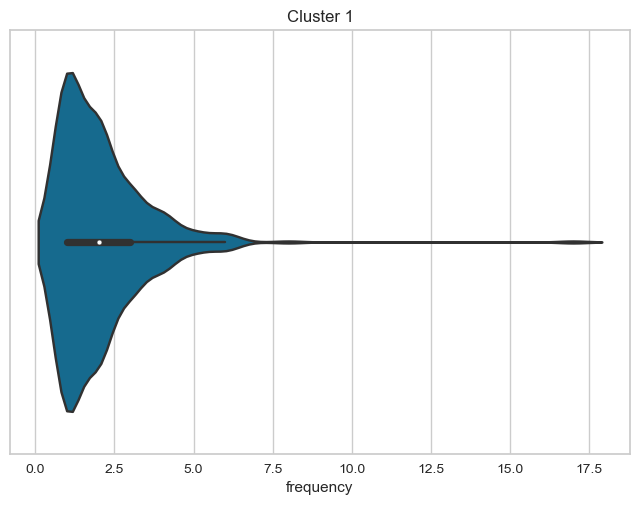

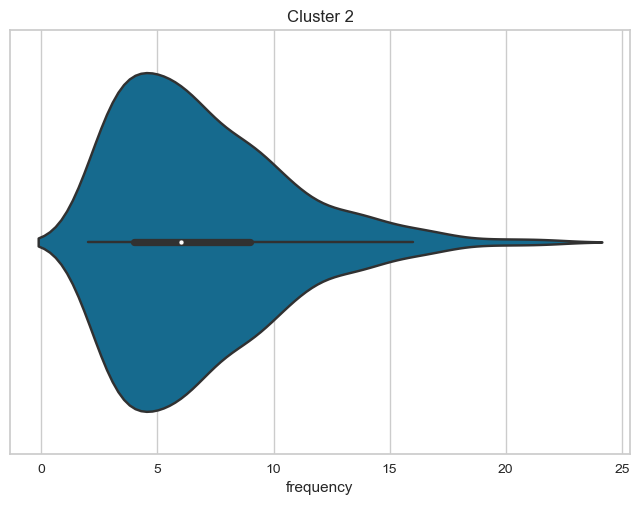

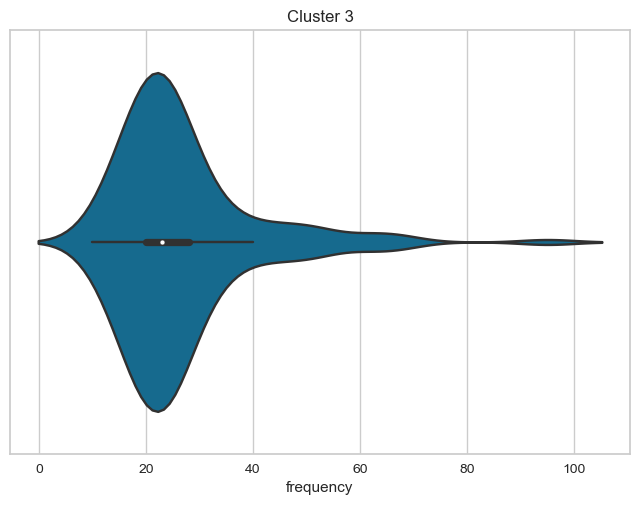

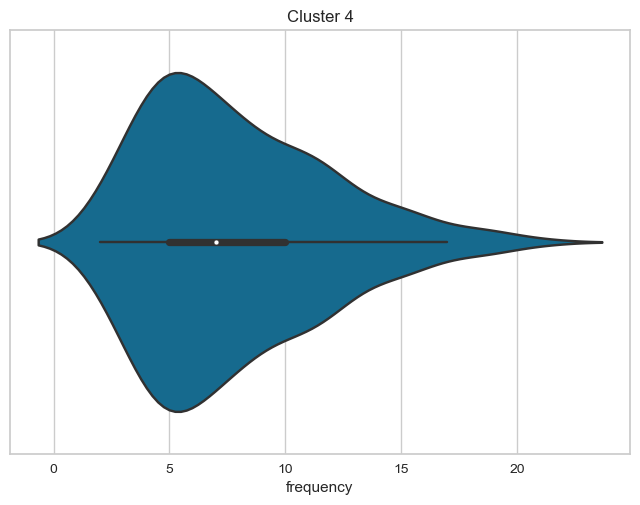

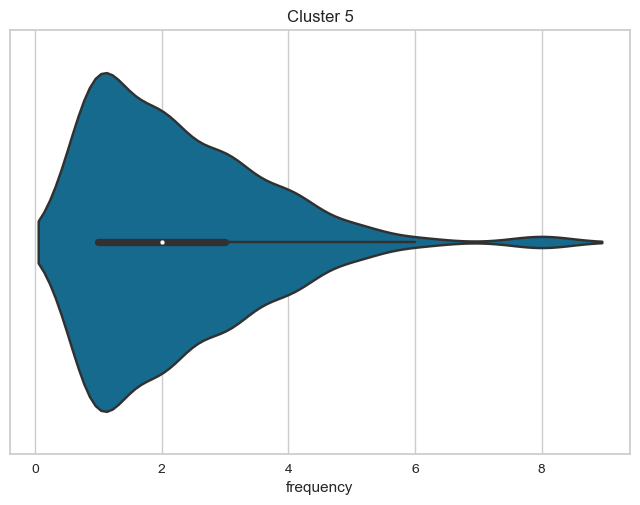

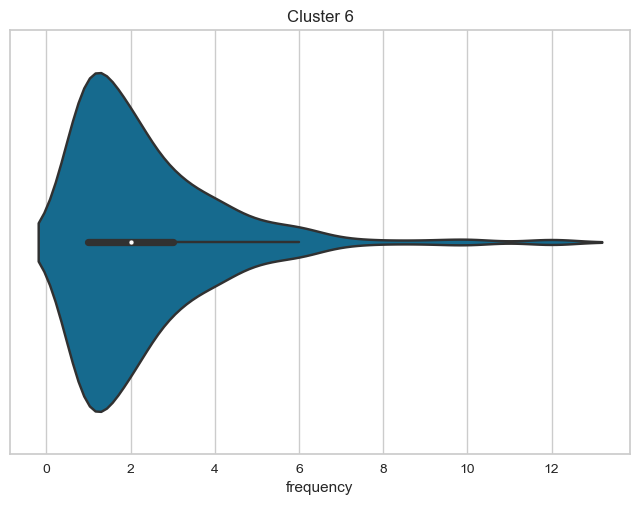

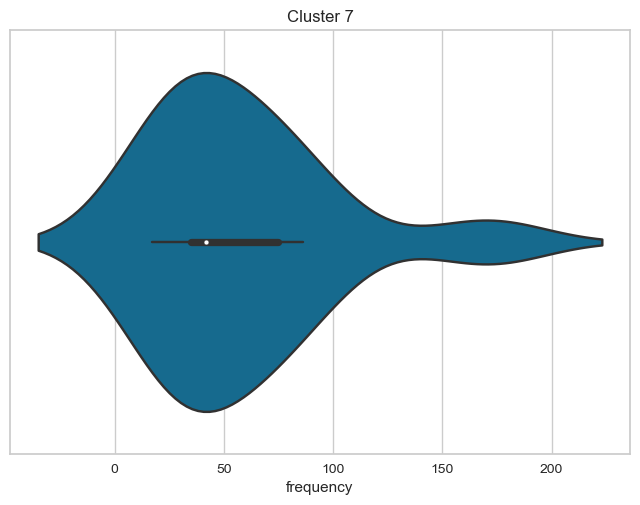

In [30]:
# Generate violin subplots for the distribution of the "frequency" feature for each of the clusters.
for i in range(8):
    sns.violinplot(x=results[results['cluster'] == i]['frequency'])
    plt.title(f"Cluster {i}")
    plt.show()







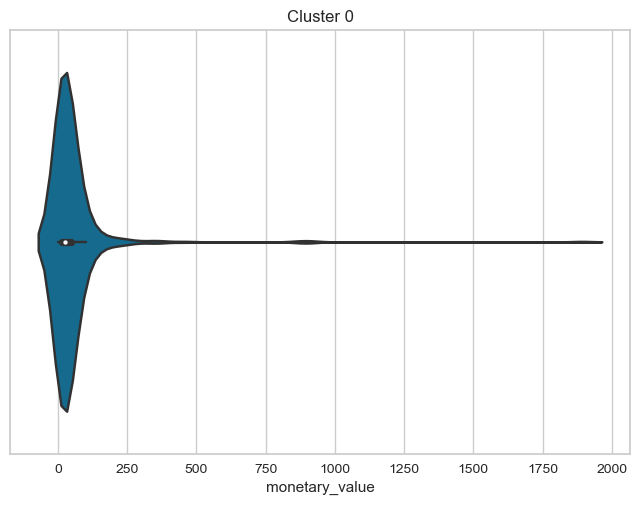

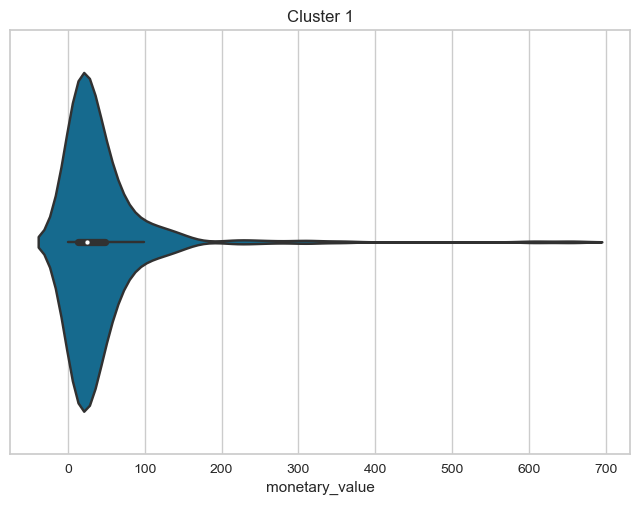

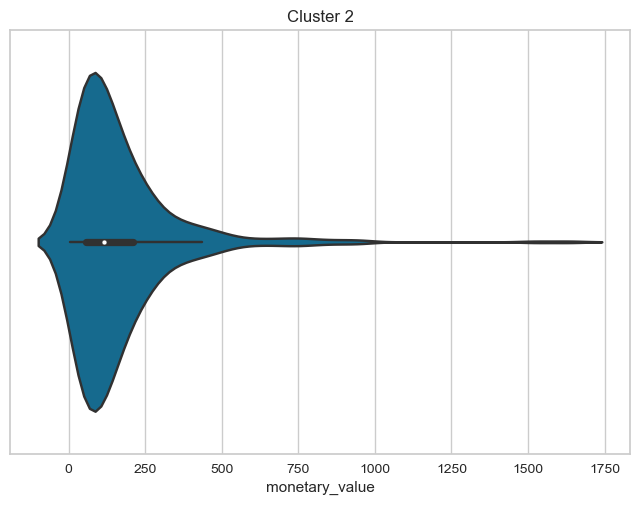

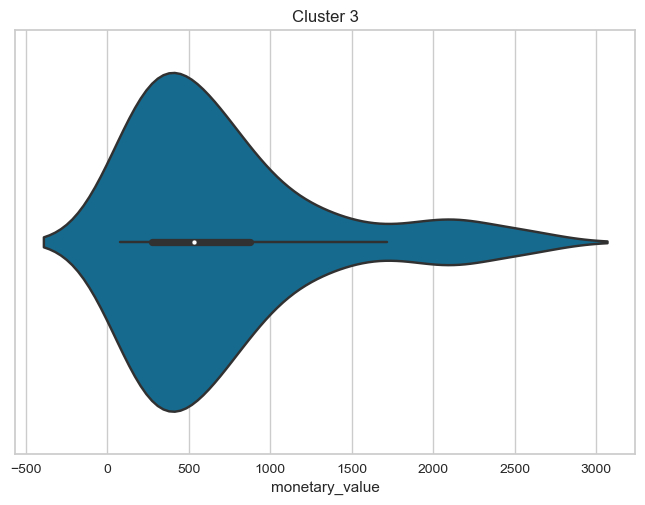

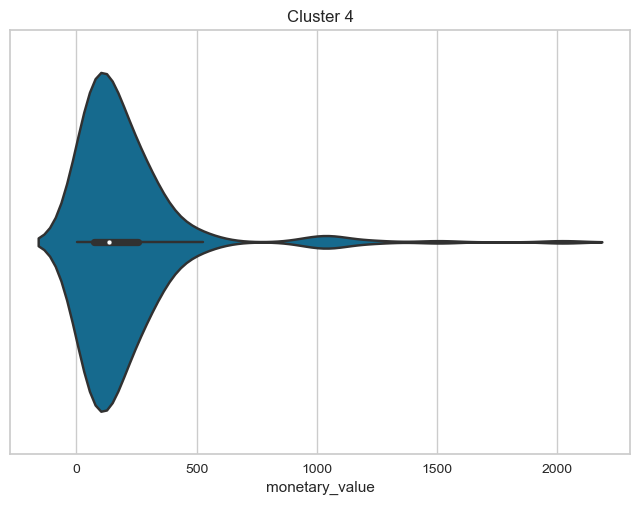

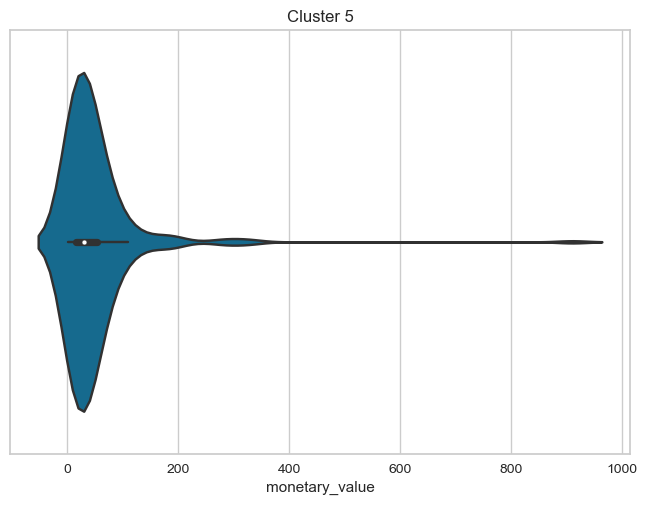

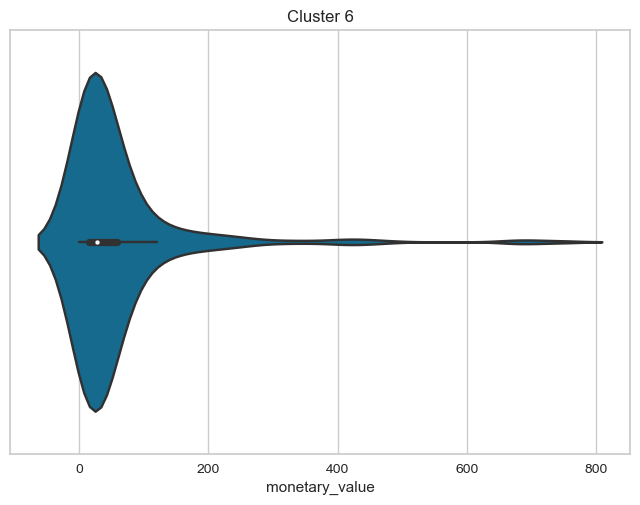

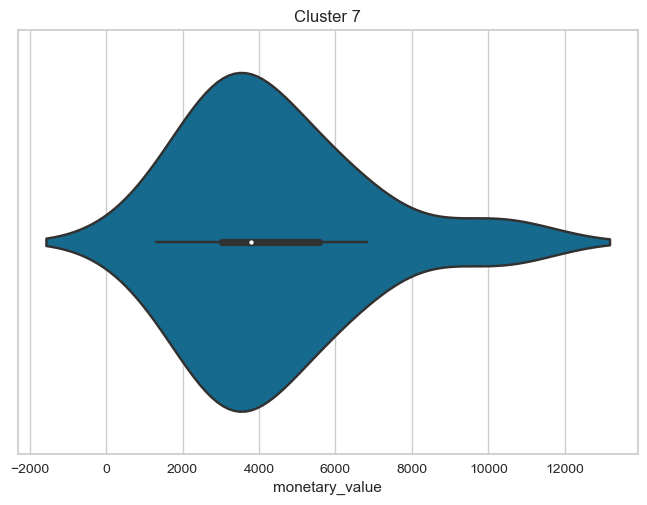

In [31]:
# Generate violin subplots for the distribution of the "monetary_value" feature for each of the clusters.

for i in range(8):
    sns.violinplot(x=results[results['cluster'] == i]['monetary_value'])
    plt.title(f"Cluster {i}")
    plt.show()






In [53]:
#results[results.cluster.isin([0,6,1,5])].monetary_value.mean()
results[results.cluster.isin([2,3,4,7])].monetary_value.mean()

317.00740560292326

# Perform PCA to visualize the clusters in three dimensions

In [32]:
results.head()

,cluster,frequency,recency,monetary_value,num_unique_items,tenure,churned
CustomerID,,,,,,,
u12747,4,11,3,302.76,3,369.0,1.0
u12748,3,95,2,783.19,10,369.0,0.0
u12749,6,6,4,251.42,3,130.0,1.0
u1282,1,1,327,17.70,1,326.0,0.0
u12822,6,1,88,16.50,1,87.0,1.0


In [33]:
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

In [68]:
def visualize(y_kmeans, data_scaled, n_clusters):
    """
    Run PCA on the data to reduce the dimensions.
    Visualize the customers with their predicted clusters.
    Provide information about which clusters fall into which new dimensions.
    """
    # Run PCA to reduce dimensions
    reduced_data = PCA(n_components=6).fit(data_scaled)
    eigenvalues = reduced_data.explained_variance_
# Plot the scree plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
    plt.title('Scree Plot')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Eigenvalue')
    plt.xticks(range(1, len(eigenvalues) + 1))
    plt.grid(True)
    plt.show()
    plt.clf()
    
    reduced_data = PCA(n_components=3).fit_transform(data_scaled)
    results = pd.DataFrame(reduced_data, columns=['pca1', 'pca2', 'pca3'])
    results = pd.concat([results, pd.DataFrame(y_kmeans, columns=['cluster'])], axis=1)
    # Set up the color palette
    cmap = sns.color_palette('Set1', n_colors=n_clusters, desat=.5)

    # Plot the data in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for cluster, color in zip(results['cluster'].unique(), cmap):
        cluster_data = results[results['cluster'] == cluster]
        ax.scatter(cluster_data['pca1'], cluster_data['pca2'], cluster_data['pca3'], c=color, label=f'Cluster {cluster}')
    
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    ax.set_title('k-means Clustering with 3 Dimensions')
    ax.legend()
    
    plt.show()

    # Summarize the clusters in the new PCA dimensions
    cluster_summary = results.groupby('cluster').agg({
        'pca1': ['mean', 'std'],
        'pca2': ['mean', 'std'],
        'pca3': ['mean', 'std']
    }).reset_index()

    print("Cluster Summary in PCA Dimensions:")
    print(cluster_summary)

    return cluster_summary

# Sample usage
# visualize(y_kmeans, data_scaled, n_clusters)


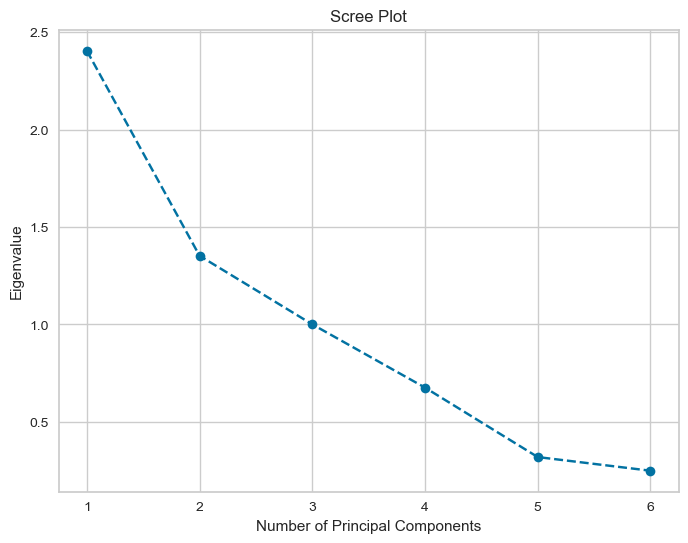

<Figure size 800x550 with 0 Axes>

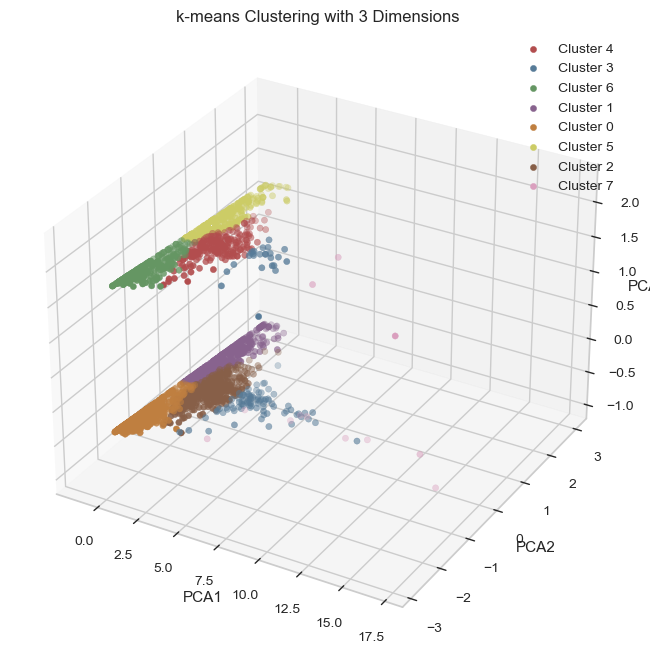

Cluster Summary in PCA Dimensions:
  cluster      pca1                pca2                pca3          
               mean       std      mean       std      mean       std
0       0 -0.847288  0.442229 -1.197451  0.567980 -0.689747  0.032356
1       1 -0.819804  0.444497  1.358341  0.736410 -0.819469  0.038798
2       2  0.666312  0.693352  0.014455  0.524964 -0.728484  0.034835
3       3  3.770329  1.349223 -0.034765  0.469678 -0.238198  0.872146
4       4  0.910303  0.767732  0.199001  0.563500  1.362119  0.039992
5       5 -0.772671  0.488794  1.461495  0.750485  1.271537  0.040093
6       6 -0.811830  0.490097 -1.045157  0.556542  1.397127  0.030742
7       7  9.795000  4.242992 -0.824686  0.829133  0.099961  1.144646


cluster      pca1                pca2                pca3          
               mean       std      mean       std      mean       std
0       0 -0.847288  0.442229 -1.197451  0.567980 -0.689747  0.032356
1       1 -0.819804  0.444497  1.358341  0.736410 -0.819469  0.038798
2       2  0.666312  0.693352  0.014455  0.524964 -0.728484  0.034835
3       3  3.770329  1.349223 -0.034765  0.469678 -0.238198  0.872146
4       4  0.910303  0.767732  0.199001  0.563500  1.362119  0.039992
5       5 -0.772671  0.488794  1.461495  0.750485  1.271537  0.040093
6       6 -0.811830  0.490097 -1.045157  0.556542  1.397127  0.030742
7       7  9.795000  4.242992 -0.824686  0.829133  0.099961  1.144646

In [69]:
# Call the function to perform PCA and plot the clusters.
visualize(y_kmeans,customer_data_scaled,8)


# Perform PCA to visualize the clusters in two dimensions as this is the best choice

In [56]:
def visualize(y_kmeans, data_scaled, n_clusters):
    """
    Run PCA on the data to reduce the dimensions.
    
    Visualize the customers with their predicted clusters.

    """

    reduced_data = PCA(n_components = 2).fit_transform(data_scaled)
    results = pd.DataFrame(reduced_data, columns = ['pca1', 'pca2'])
    results = pd.concat([results, pd.DataFrame(y_kmeans)], axis = 1).rename(columns={0 : "cluster"})

    cmap = sns.color_palette('Set1', n_colors = n_clusters, desat = .5)

    sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = results, palette = cmap)
    plt.title('k-means Clustering with 2 Dimensions')
    plt.show();

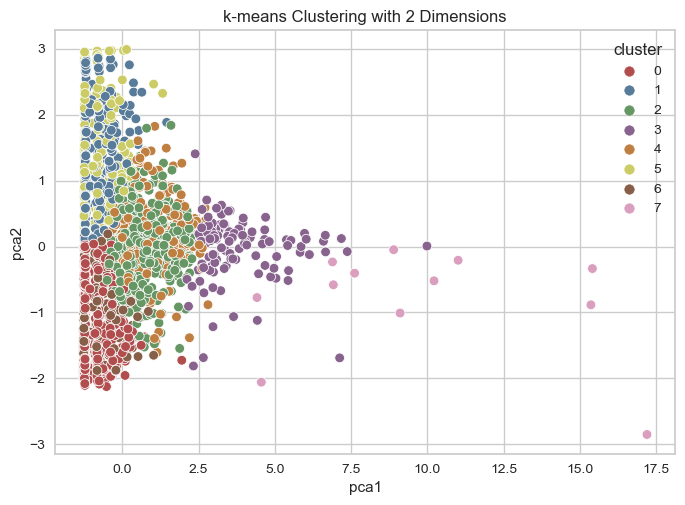

In [57]:
visualize(y_kmeans,customer_data_scaled,8)

# Save the optimal model

In [36]:
# Save the optimal model as a pickle file named optimal_clustering_model.pickle.
pickle.dump(kmeans,open('../models/optimal_clustering_model.pickle','wb'))
